# Project 6 Bike sharing analysis Linear Regression

Dataset characteristics

  - Both hour.csv and day.csv have the following fields, except hr   which is not available in day.csv
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Import Libraries

**Environment & library imports — technical explanation**

- **os**: file-system utilities for checking paths and managing local files.
- **pandas (pd)**: the primary data container (DataFrame); used for CSV I/O, indexing, dtypes, and transformations.
- **numpy (np)**: numerical operations and array utilities; used for metric computations and numeric processing.
- **matplotlib.pyplot (plt)** and **seaborn (sns)**: plotting libraries for exploratory visualizations (boxplots, histograms, heatmaps, scatterplots).
- **urllib.request as urllib**: HTTP client for downloading remote files. Calling `urllib.urlretrieve(url, filename)` writes a remote resource to disk (note: this works when `urllib` is the `urllib.request` module).
- **zipfile**: read files from ZIP archives without extracting them to disk using `ZipFile.open()`.

Why these are used: together they enable reproducible data ingestion, EDA (exploratory data analysis), preprocessing, visualization, and model prototyping in a lightweight environment.

In [72]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request as urllib
import zipfile

### Load Dataset

**Quick data preview**

- `df.head(10)` displays the first 10 rows so you can confirm column names, date formats, and sample values before processing.
- Output: a small table showing sample records; use it to verify successful read and expected columns.

In [73]:
zip_url = "https://samatrix-data.s3.ap-south-1.amazonaws.com/ML/Data-Bike-Share.zip"
local_zip = "bike.zip"
if not os.path.exists(local_zip):
    urllib.urlretrieve(zip_url, local_zip)

with zipfile.ZipFile(local_zip) as z:
    with z.open("day.csv") as f:
        df = pd.read_csv(f)

In [74]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


### Describe dataset : spread of data

In [75]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Information about dataset

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### shape of dataset

**Dataset shape, columns, and missing-values check**

- `df.shape`, `df.columns`, and `df.isnull().sum()` confirm dataset dimensions, available fields, and per-column missing counts.
- Output: quick diagnostics to ensure completeness and guide cleaning steps.

In [77]:
df.shape

(731, 16)

In [78]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [79]:
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


#### we will do some data preprocessing

In [80]:
# Convert date column if not already done
df['dteday'] = pd.to_datetime(df['dteday'])

df['day_of_week'] = df['dteday'].dt.dayofweek   # 0=Monday, 6=Sunday

df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)

df = df.drop(columns=['instant','dteday','casual','registered'], errors='ignore')


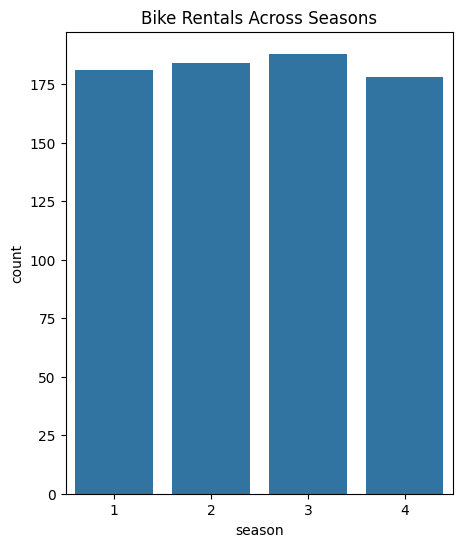

In [81]:
plt.figure(figsize=(5,6))
sns.countplot(data=df, x="season")
plt.title("Bike Rentals Across Seasons")
plt.show()

In [82]:
df_cleaned = df[['windspeed','hum','temp','atemp']].copy()

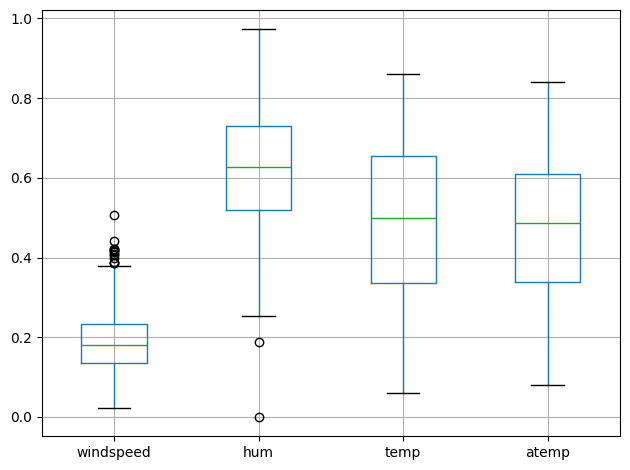

In [83]:
df_cleaned.boxplot()
plt.tight_layout()

### Boxplot interpreteation
From the above boxplots, we observe that the features windspeed and humidity contain some outliers. However, we do not remove these outliers because they likely represent real-world extreme weather conditions (such as unusually high wind speeds or very low/high humidity).
These situations can strongly influence bike rental demand — for example:

Extreme weather (storms, heavy wind, or very high humidity) may discourage people from renting bikes.

Pleasant or rare conditions might increase usage unexpectedly.

Since these values reflect genuine variability in user behavior and environmental conditions, they are retained in the dataset instead of being treated as noise.

In [84]:
cols = ['windspeed','hum','temp','atemp']

In [85]:
# sns.pairplot(df)


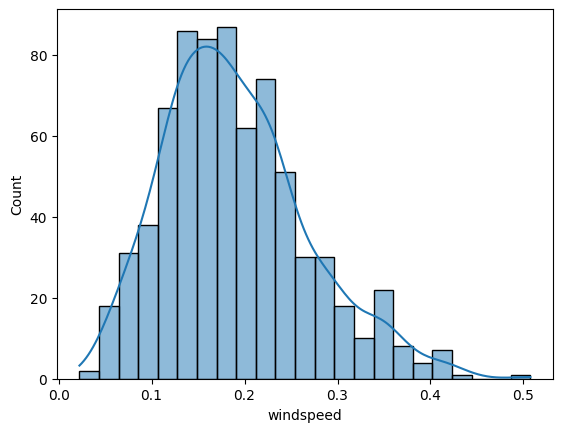

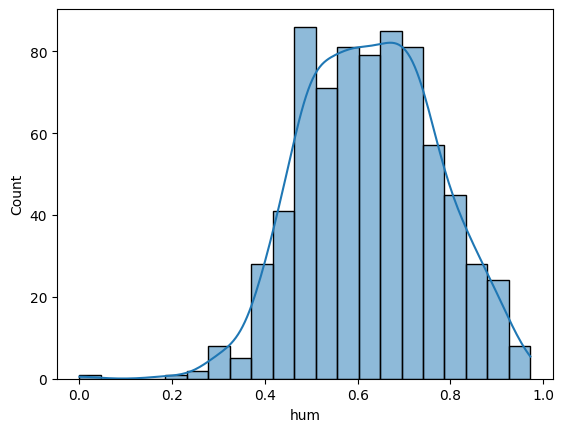

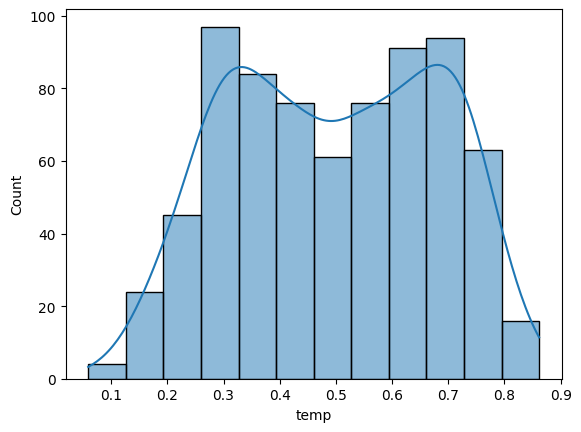

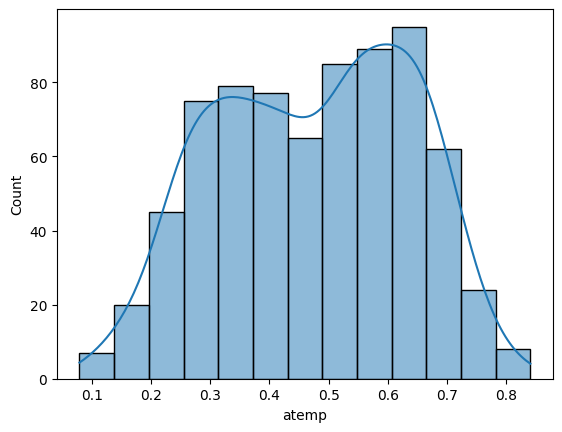

In [86]:
for i in cols:

      sns.histplot(df[i],kde=True)
      plt.show()

**Histograms + KDE — distributional insight**

- Histograms with KDE display each feature's empirical distribution and smooth density estimate; look for skewness, modality, and tail behavior.
- Output: informs transformation decisions (e.g., log transform for right-skew) and reveals whether a feature is approximately Gaussian.

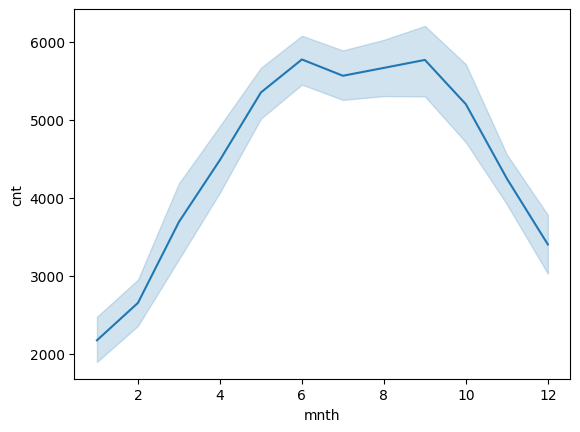

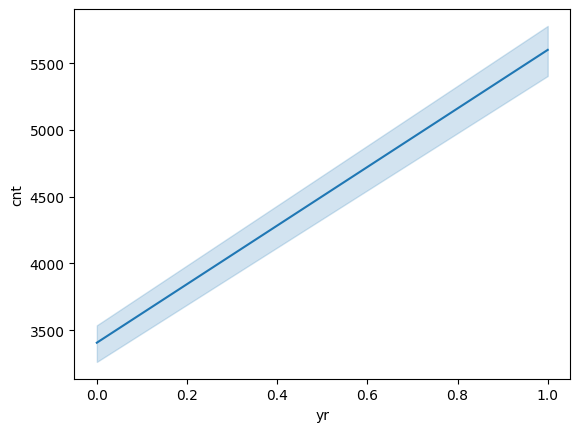

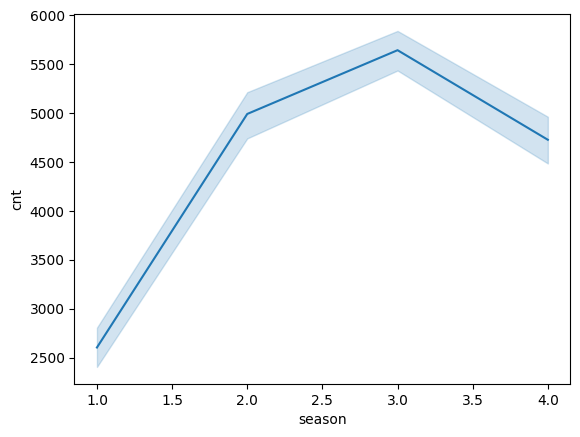

In [87]:
for i in ['mnth','yr','season']:

  sns.lineplot(x=df[i],y=df['cnt'])
  plt.show()

<Axes: >

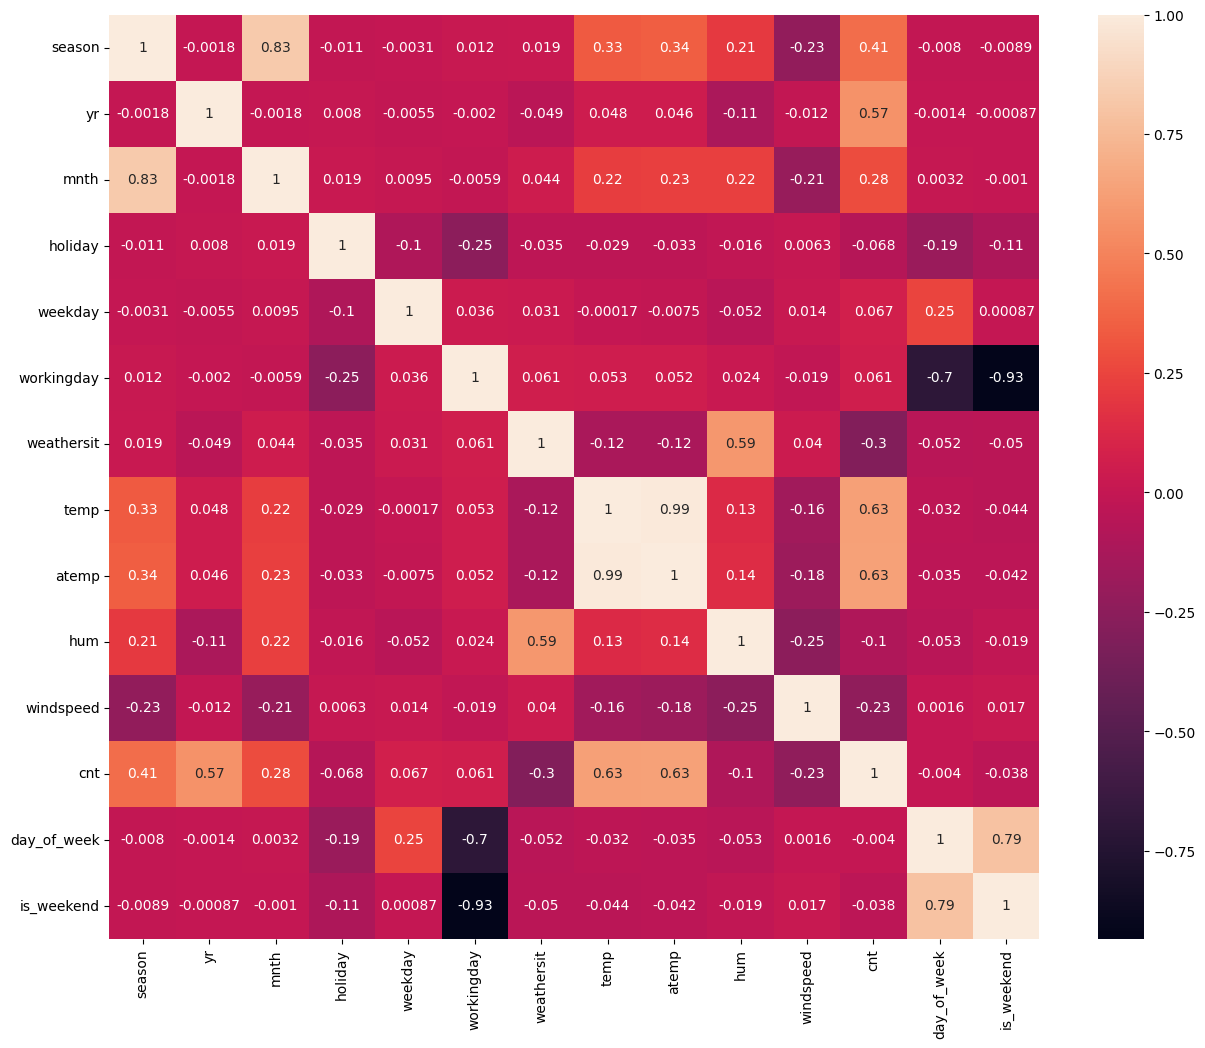

In [115]:
plt.figure(figsize=(15,12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True)

In [89]:
# Corrected feature selection
X = df[['season','yr','mnth','holiday','weekday','workingday',
        'weathersit','temp','atemp','hum','windspeed']]

y = df['cnt']


In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [91]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [92]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [93]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled,y_train)
y_pred = lr_model.predict(X_test_scaled)


In [94]:
from sklearn.metrics import *

In [95]:
mse_error = mean_squared_error(y_test,y_pred)
mse_error

777068.4148123119

**Mean Absolute Error (MAE) — meaning**

- MAE is the average absolute error |prediction − actual| and is robust to large outliers relative to MSE.
- Output: a single numeric value in the same units as `cnt`; lower is better and easier to interpret than MSE.

In [96]:
mae_error =mean_absolute_error(y_test,y_pred)
mae_error

642.874114212218

In [97]:
rmse_score = np.sqrt(mse_error)
rmse_score

np.float64(881.5148409484165)

In [98]:
r2_lr = r2_score(y_test,y_pred)
r2_lr

0.8002307500142452

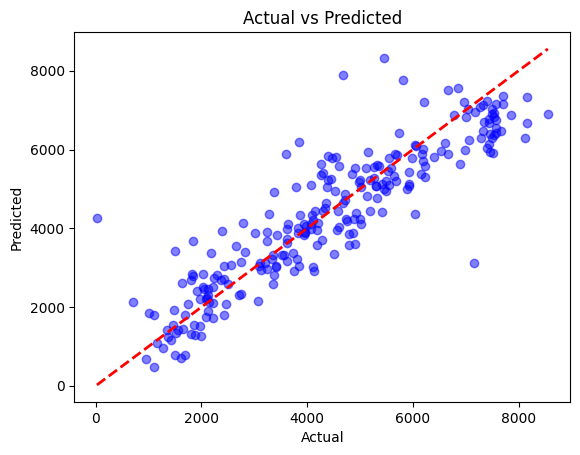

In [99]:
plt.scatter(y_test,y_pred,color='blue',alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Actual vs Predicted")
plt.show()

### Linear Regression plot

Practical takeaway: this plot implies a good overall fit but not perfect — quantify with RMSE and R² and inspect residuals to confirm no systematic bias (e.g., under/overprediction at high values). Investigate outlier rows (data issues or rare events) and consider adding features or a nonlinear model if residual patterns persist.

In [100]:
# Get coefficients and intercept
intercept = lr_model.intercept_
coefficients = lr_model.coef_

print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

Intercept: 4553.239263803681
Coefficients: [ 570.24224207  988.50252958 -151.26970154  -68.56680044  127.44053837
   58.90911908 -329.44361269 -563.06264412 1546.68659247 -154.07905434
 -156.98683907]


### RandomForest